# House Loan Data Analysis

## Deep Learning Project_01

In [1]:
# Lets first import the important libaray.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# let ignore the un necessary warnings
import warnings
warnings.filterwarnings("ignore")

### Load the dataset that is given to you

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(307511, 122)

### Check for null values in the dataset

In [6]:
pd.set_option('display.max_rows', 500)

In [7]:
((df.isnull().sum()/df.shape[0])*100)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [8]:
# Lets drop the colums in which max of the data point is missed.
loan_df = df.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
                  'YEARS_BUILD_AVG','COMMONAREA_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG', 'FLOORSMIN_AVG',
                  'LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
                  'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE',
                  'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE',
                  'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI',
                  'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
                  'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
                  'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE',
                  'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','SK_ID_CURR'], axis=1)

In [9]:
loan_df = loan_df.dropna(subset=['OCCUPATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
                                'EXT_SOURCE_2','NAME_TYPE_SUITE','AMT_ANNUITY'])

In [10]:
loan_df.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [11]:
loan_df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         151480
Revolving loans     16252
Name: NAME_CONTRACT_TYPE, dtype: int64

In [12]:
loan_df['CODE_GENDER'].value_counts()

F      103737
M       63993
XNA         2
Name: CODE_GENDER, dtype: int64

In [13]:
loan_df['FLAG_OWN_CAR'].value_counts()

N    102179
Y     65553
Name: FLAG_OWN_CAR, dtype: int64

In [14]:
loan_df['FLAG_OWN_REALTY'].value_counts()

Y    113749
N     53983
Name: FLAG_OWN_REALTY, dtype: int64

In [15]:
loan_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      137289
Family              21103
Spouse, partner      6312
Children             1502
Other_B               928
Other_A               455
Group of people       143
Name: NAME_TYPE_SUITE, dtype: int64

In [16]:
loan_df['NAME_INCOME_TYPE'].value_counts()

Working                 106020
Commercial associate     46553
State servant            15144
Student                     10
Businessman                  3
Pensioner                    2
Name: NAME_INCOME_TYPE, dtype: int64

In [17]:
loan_df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    115722
Higher education                  44477
Incomplete higher                  6010
Lower secondary                    1433
Academic degree                      90
Name: NAME_EDUCATION_TYPE, dtype: int64

In [18]:
loan_df['NAME_FAMILY_STATUS'].value_counts()

Married                 111844
Single / not married     24171
Civil marriage           16515
Separated                10769
Widow                     4433
Name: NAME_FAMILY_STATUS, dtype: int64

In [19]:
loan_df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      147526
With parents             9172
Municipal apartment      5916
Rented apartment         2909
Office apartment         1517
Co-op apartment           692
Name: NAME_HOUSING_TYPE, dtype: int64

In [20]:
loan_df['OCCUPATION_TYPE'].value_counts()

Laborers                 43437
Sales staff              24254
Core staff               22669
Managers                 17787
Drivers                  14546
High skill tech staff     9264
Accountants               8135
Medicine staff            7223
Security staff            5218
Cooking staff             4633
Cleaning staff            3637
Private service staff     1975
Low-skill Laborers        1443
Secretaries               1047
Waiters/barmen staff      1010
Realty agents              569
HR staff                   460
IT staff                   425
Name: OCCUPATION_TYPE, dtype: int64

In [21]:
loan_df['WEEKDAY_APPR_PROCESS_START'].value_counts()

WEDNESDAY    28655
TUESDAY      28469
THURSDAY     27600
FRIDAY       27536
MONDAY       27298
SATURDAY     19159
SUNDAY        9015
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [22]:
loan_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    42113
Self-employed             25892
Other                      9194
Medicine                   8548
Government                 6958
Business Entity Type 2     6893
School                     6316
Trade: type 7              5608
Kindergarten               5327
Construction               4675
Business Entity Type 1     3830
Transport: type 4          3540
Trade: type 3              2584
Industry: type 9           2403
Security                   2397
Industry: type 3           2325
Housing                    2061
Bank                       1867
Police                     1824
Industry: type 11          1773
Military                   1717
Transport: type 2          1678
Postal                     1645
Agriculture                1567
Trade: type 2              1350
Security Ministries        1324
Restaurant                 1230
Services                   1124
Industry: type 7            898
Transport: type 3           854
University                  847
Industry

### Encode the columns that is required for the model

In [23]:
# Now We have some categorical column that we will encode foe the model building.
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
loan_df['NAME_CONTRACT_TYPE'] = le.fit_transform(loan_df['NAME_CONTRACT_TYPE'])
loan_df['CODE_GENDER'] = le.fit_transform(loan_df['CODE_GENDER'])
loan_df['FLAG_OWN_CAR'] = le.fit_transform(loan_df['FLAG_OWN_CAR'])
loan_df['FLAG_OWN_REALTY'] = le.fit_transform(loan_df['FLAG_OWN_REALTY'])
loan_df['NAME_TYPE_SUITE'] = le.fit_transform(loan_df['NAME_TYPE_SUITE'])
loan_df['NAME_INCOME_TYPE'] = le.fit_transform(loan_df['NAME_INCOME_TYPE'])
loan_df['NAME_EDUCATION_TYPE'] = le.fit_transform(loan_df['NAME_EDUCATION_TYPE'])
loan_df['NAME_FAMILY_STATUS'] = le.fit_transform(loan_df['NAME_FAMILY_STATUS'])
loan_df['NAME_HOUSING_TYPE'] = le.fit_transform(loan_df['NAME_HOUSING_TYPE'])
loan_df['OCCUPATION_TYPE'] = le.fit_transform(loan_df['OCCUPATION_TYPE'])
loan_df['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(loan_df['WEEKDAY_APPR_PROCESS_START'])
loan_df['ORGANIZATION_TYPE'] = le.fit_transform(loan_df['ORGANIZATION_TYPE'])

In [26]:
loan_df['OCCUPATION_TYPE'].value_counts()

8     43437
14    24254
3     22669
10    17787
4     14546
6      9264
0      8135
11     7223
16     5218
2      4633
1      3637
12     1975
9      1443
15     1047
17     1010
13      569
5       460
7       425
Name: OCCUPATION_TYPE, dtype: int64

### Print percentage of default to payer of the dataset for the TARGET column

In [27]:
loan_df.TARGET.value_counts()

0    153525
1     14207
Name: TARGET, dtype: int64

In [28]:
((loan_df['TARGET']==1).sum() / loan_df.shape[0])*100

8.470059380440226

From above code its clear that dataset is highly imbalanced, so we will balanced the dataset.

### Balance the dataset if the data is imbalanced

In [29]:
# Lets apply the smote oversampling thechnique 
from imblearn.over_sampling import SMOTE

In [35]:
x = loan_df.drop(['TARGET'], axis=1)
y = loan_df[['TARGET']]

In [36]:
smt = SMOTE()

In [37]:
x_sm, y_sm = smt.fit_resample(x, y)

In [39]:
print(y_sm.shape)
print(y_sm.value_counts())

(307050, 1)
TARGET
0         153525
1         153525
dtype: int64


Now dataset is balanced.

In [40]:
loan_df = pd.concat([x_sm,y_sm], axis=1)

In [50]:
loan_df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,6,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,0
4,0,1,1,1,0,360000.0,1530000.0,42075.0,1530000.0,6,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Plot the balanced data or imbalanced data


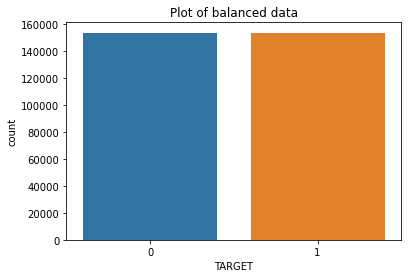

In [47]:
sns.countplot(loan_df['TARGET'])
plt.title('Plot of balanced data')
plt.show()

In [51]:
x = loan_df.drop(["TARGET"], axis = 1)
y = loan_df[["TARGET"]]

In [49]:
# Now lets split the data set 
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=10)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()

In [56]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [58]:
x_train.shape

(230287, 71)

In [48]:
# Now lets create the ANN model for this problem 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU, ReLU
from tensorflow.keras.layers import Dropout

In [57]:
classifier = Sequential()

In [59]:
# lets First introducing the input layer 
classifier.add(Dense(units=71, activation='relu'))

In [60]:
# now lets introduce the first hidden layer
classifier.add(Dense(units=50, activation='relu'))

In [61]:
# now lets introduce the second hidden layer
classifier.add(Dense(units=35, activation='relu'))

In [62]:
# Adding the output layer 
classifier.add(Dense(1, activation='sigmoid'))

In [63]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [64]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# early stoping
import tensorflow as tf
early_stoping = tf.keras.callbacks.EarlyStopping(
monitor = 'val_loss',
min_delta=0.0001,
patience=20,
verbose=1,
mode='auto',
baseline=None,
restore_best_weights=False)

In [66]:
model = classifier.fit(x_train, y_train, validation_split=0.33,batch_size=10, epochs=1000, callbacks=early_stoping)

Epoch 1/1000
15430/15430 [==============================] - 144s 9ms/step - loss: 0.3602 - accuracy: 0.8473 - val_loss: 0.3223 - val_accuracy: 0.8640
Epoch 2/1000
15430/15430 [==============================] - 181s 12ms/step - loss: 0.3084 - accuracy: 0.8728 - val_loss: 0.2987 - val_accuracy: 0.8775
Epoch 3/1000
15430/15430 [==============================] - 235s 15ms/step - loss: 0.2902 - accuracy: 0.8831 - val_loss: 0.2872 - val_accuracy: 0.8831
Epoch 4/1000
15430/15430 [==============================] - 167s 11ms/step - loss: 0.2766 - accuracy: 0.8895 - val_loss: 0.2775 - val_accuracy: 0.8881
Epoch 5/1000
15430/15430 [==============================] - 120s 8ms/step - loss: 0.2761 - accuracy: 0.8933 - val_loss: 0.2748 - val_accuracy: 0.8896
Epoch 6/1000
15430/15430 [==============================] - 133s 9ms/step - loss: 0.2656 - accuracy: 0.8954 - val_loss: 0.2722 - val_accuracy: 0.8917
Epoch 7/1000
15430/15430 [==============================] - 134s 9ms/step - loss: 0.2648 - accura

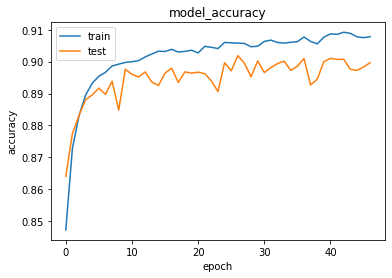

In [67]:
# Summarize the history for accuracy 
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [80]:
# Making the prediction and evaluating the model.
y_pred = classifier.predict(x_test)
y_preds = (y_pred>=0.5)

2399/2399 [==============================] - 13s 5ms/step


In [81]:
y_preds

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, auc,roc_curve,roc_auc_score

In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     38389
           1       0.94      0.86      0.90     38374

    accuracy                           0.90     76763
   macro avg       0.90      0.90      0.90     76763
weighted avg       0.90      0.90      0.90     76763



### Calculate Sensitivity as a metrice

In [84]:
confusion = confusion_matrix(y_test, y_preds)

In [85]:
confusion

array([[36222,  2167],
       [ 5484, 32890]], dtype=int64)

In [86]:
# True Positive
TP = confusion[1,1]
# True Negatives
TN = confusion[0,0] 
# False Positives
FP = confusion[0,1]
# False Negatives
FN = confusion[1,0] 

In [87]:
sensitivity = TP/(TP+FN) 
print("Sensitivity: %.3f" %sensitivity)

Sensitivity: 0.857


### Calculate area under receiver operating characteristics curve

2399/2399 [==============================] - 13s 5ms/step
AUC: 0.939


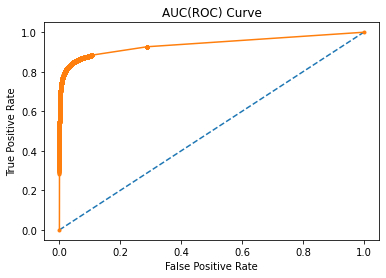

In [90]:
# Let's compute the AUC(ROC) Receiver Operating Characteristics curve and also visualize by th
probs = classifier.predict(x_test)
# Area under the curve.
auc_cl = roc_auc_score(y_test, probs)
print("AUC: %.3f" %auc_cl)
# Calculating the roc curve.
fpr, tpr, thresholds = roc_curve(y_test, probs)
#plotting the auc(roc) curve.
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr,tpr, marker='.')
plt.title("AUC(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()